In [29]:
# Compute similarity between industries 
# using https://www.semantic-web-journal.net/system/files/swj3330.pdf 
# 
# This code is used to generate the information in Tables 4 & 5 in the paper
#
# 1 July 2024
# marieke.van.erp@dh.huc.knaw.nl

import os
import requests
import json
import pandas as pd

In [30]:
def call_semantic_similarity(input_file, url):
    file_name = os.path.basename(input_file)
    files = {
        'file': (file_name, open(input_file, mode='rb'), 'application/octet-stream')
    }
    resp = requests.post(url, files=files, params={'similarity_types': 'all'})
    s = json.loads(resp.json())
    return pd.DataFrame(s)

In [4]:
#url = 'https://kgtk.isi.edu/similarity_api'
#df = call_semantic_similarity('test_file.tsv', url)

{'similarity': 0.8480927733695293, 'q1': 'Q144', 'q1_label': 'dog', 'q2': 'Q146', 'q2_label': 'house cat'}


In [307]:
# Load file with industries 
company_data = pd.read_csv("company_subsidiary_industry.tsv", sep = "\t")
company_data['industry.value'] = company_data['industry.value'].map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
company_data

,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,industryLabel.xml:lang,industryLabel.value,industry2Label.xml:lang,industry2Label.value
0,0,http://www.wikidata.org/entity/Q23317,http://www.wikidata.org/entity/Q156578,Q190117,1966-01-01T00:00:00Z,http://www.wikidata.org/entity/Q190117,en,Volkswagen Group,en,Audi AG,en,automotive industry,en,automotive industry
1,1,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,http://www.wikidata.org/entity/Q190117,en,Bianchi Bicycles,en,Autobianchi,en,automotive industry,en,automotive industry
2,2,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,http://www.wikidata.org/entity/Q190117,en,Bianchi Bicycles,en,Autobianchi,en,automotive industry,en,automotive industry
3,3,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,http://www.wikidata.org/entity/Q190117,en,Bianchi Bicycles,en,Autobianchi,en,bicycle industry,en,automotive industry
4,4,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,http://www.wikidata.org/entity/Q190117,en,Bianchi Bicycles,en,Autobianchi,en,bicycle industry,en,automotive industry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2958,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q27973,2024-01-01T00:00:00Z,http://www.wikidata.org/entity/Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,en,real-time ridesharing,en,peer-to-peer ridesharing
2959,2959,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q638608,2024-01-01T00:00:00Z,http://www.wikidata.org/entity/Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,en,software development,en,peer-to-peer ridesharing
2960,2960,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q998426,2024-01-01T00:00:00Z,http://www.wikidata.org/entity/Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,en,bookselling,en,peer-to-peer ridesharing
2961,2961,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q56560668,2024-01-01T00:00:00Z,http://www.wikidata.org/entity/Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,en,book industry,en,peer-to-peer ridesharing


In [244]:
company_data['industry2.value'] = company_data['industry2.value'].astype(str).map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
#company_data
industries = company_data[['industry.value', 'industry2.value']] #.value_counts() #.reset_index(name='count')      

In [14]:
industries.to_csv("industries.tsv", sep = "\t", index=False, header=False)

In [16]:
industries

,industry.value,industry2.value
0,http://www.wikidata.org/entity/Q190117,http://www.wikidata.org/entity/Q190117
1,http://www.wikidata.org/entity/Q190117,http://www.wikidata.org/entity/Q190117
2,http://www.wikidata.org/entity/Q190117,http://www.wikidata.org/entity/Q190117
3,http://www.wikidata.org/entity/Q17018236,http://www.wikidata.org/entity/Q190117
4,http://www.wikidata.org/entity/Q17018236,http://www.wikidata.org/entity/Q190117
...,...,...
2958,http://www.wikidata.org/entity/Q27973,http://www.wikidata.org/entity/Q23582374
2959,http://www.wikidata.org/entity/Q638608,http://www.wikidata.org/entity/Q23582374
2960,http://www.wikidata.org/entity/Q998426,http://www.wikidata.org/entity/Q23582374
2961,http://www.wikidata.org/entity/Q56560668,http://www.wikidata.org/entity/Q23582374


In [57]:
industries = industries.drop_duplicates()
industries

,industry.value,industry2.value
0,Q190117,Q190117
3,Q17018236,Q190117
5,Q16955053,Q190117
7,Q289,Q11033
9,Q418,Q11033
...,...,...
2958,Q27973,Q23582374
2959,Q638608,Q23582374
2960,Q998426,Q23582374
2961,Q56560668,Q23582374


In [58]:
industries_cleaned = industries

In [59]:
industries_cleaned['industry.value'] = industries_cleaned['industry.value'].map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
industries_cleaned['industry2.value'] = industries_cleaned['industry2.value'].astype(str).map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
industries_cleaned                                                                       

,industry.value,industry2.value
0,Q190117,Q190117
3,Q17018236,Q190117
5,Q16955053,Q190117
7,Q289,Q11033
9,Q418,Q11033
...,...,...
2958,Q27973,Q23582374
2959,Q638608,Q23582374
2960,Q998426,Q23582374
2961,Q56560668,Q23582374


In [60]:
industries_cleaned = industries_cleaned.rename(columns={'industry.value': 'q1', 'industry2.value': 'q2'})
industries_cleaned.to_csv("industries.tsv", sep = "\t", index=False, header=False)

# quick hack as the api only does 100 calls per command 
# mkdir industries/
# mv industries.tsv industries/
# cd industries/
# split -l 25 industries.tsv 
# mv industries.tsv ../
# for x in x* ; do mv $x $x.tsv ; done
# for x in *.tsv ; do echo -e "q1\tq2\n$(cat $x)" > $x ; done 

In [61]:
url = 'https://kgtk.isi.edu/similarity_api'


In [67]:
import glob 

# Creating Empty DataFrame and Storing it in variable df
industry_similarities = pd.DataFrame()

for name in glob.glob('industries/x*.tsv'): 
    print(name) 
    df = call_semantic_similarity(name, url)
    industry_similarities = industry_similarities.append(df)
    industry_similarities.size

industries/xay.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbb.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbu.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xan.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xao.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbt.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbc.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xax.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xaz.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xba.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbv.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xam.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xal.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbw.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbs.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xah.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbd.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbe.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xai.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbr.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbp.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xak.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbg.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbf.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xaj.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbq.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xag.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xap.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbk.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbj.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xaq.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xaf.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xad.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xas.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbh.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbi.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xar.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xae.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xav.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbm.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xaa.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbl.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xaw.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xau.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbn.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xab.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xac.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbx.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xbo.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


industries/xat.tsv


/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/999325971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  industry_similarities = industry_similarities.append(df)


In [68]:
industry_similarities

,q1,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim
0,Q880371,Q75,0.648532,software industry,Internet,0.424638,0.611976,0.095397,0.091071,0.468616
1,Q941594,Q1368944,0.526668,video game industry,game industry,0.638891,0.906615,0.798527,0.987983,0.917461
2,Q56611700,Q1368944,0.627691,internet industry,game industry,0.415805,0.756913,0.158035,0.125625,0.683012
3,Q101333,,,None,None,,,,,
4,Q7590,Q178512,0.620992,transport,public transport,0.557913,0.76227,0.290986,0.917263,0.653544
...,...,...,...,...,...,...,...,...,...,...
20,Q1326885,Q11650,0.686638,electrical industry,electronics,0.408368,0.695984,0.114945,0.099417,0.517496
21,Q5358497,Q11650,0.652401,electronics industry,electronics,0.420418,0.744776,0.11729,0.095743,0.550738
22,Q116788443,,,None,None,,,,,
23,Q11456,Q581105,0.555982,semiconductor,consumer electronics,0.582105,0.583449,0.118499,0.351546,0.516811


In [69]:
industry_similarities.to_csv("industry_similarities.tsv", sep = "\t", index=False)

In [245]:
merged = pd.merge(company_data, industry_similarities, left_on=  ['industry.value', 'industry2.value'],
                   right_on= ['q1', 'q2'], 
                   how = 'left')

In [246]:
merged


,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,...,q1,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim
0,0,http://www.wikidata.org/entity/Q23317,http://www.wikidata.org/entity/Q156578,Q190117,1966-01-01T00:00:00Z,Q190117,en,Volkswagen Group,en,Audi AG,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
1,1,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
2,2,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
3,3,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q17018236,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286
4,4,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q17018236,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2958,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q27973,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q27973,Q23582374,0.786172,real-time ridesharing,peer-to-peer ridesharing,0.935825,0.969082,0.839539,0.959402,0.977826
2959,2959,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q638608,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q638608,Q23582374,0.593553,software development,peer-to-peer ridesharing,0.516606,0.299864,0.182079,0.095753,0.437221
2960,2960,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q998426,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q998426,Q23582374,0.441617,bookselling,peer-to-peer ridesharing,0.252602,0.315538,0.166187,0.088768,0.343815
2961,2961,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q56560668,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q56560668,Q23582374,0.679147,book industry,peer-to-peer ridesharing,0.536848,0.278541,0.0,0.0,0.486868


In [300]:
merged['occurrence_companies'] = merged.groupby('company.value')['company.value'].transform('size')
merged

/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/4251964216.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,...,complex,q1_label,q2_label,transe,text,class,jc,topsim,company_counts,occurrence_companies
0,0,Q23317,Q156578,Q190117,1966-01-01T00:00:00Z,Q190117,en,Volkswagen Group,en,Audi AG,...,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.000000,2,2
1,1,Q27110,Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.000000,4,4
2,2,Q27110,Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.000000,4,4
3,3,Q27110,Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286,4,4
4,4,Q27110,Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2958,Q125972007,Q125962737,Q27973,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,0.786172,real-time ridesharing,peer-to-peer ridesharing,0.935825,0.969082,0.839539,0.959402,0.977826,28,28
2959,2959,Q125972007,Q125962737,Q638608,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,0.593553,software development,peer-to-peer ridesharing,0.516606,0.299864,0.182079,0.095753,0.437221,28,28
2960,2960,Q125972007,Q125962737,Q998426,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,0.441617,bookselling,peer-to-peer ridesharing,0.252602,0.315538,0.166187,0.088768,0.343815,28,28
2961,2961,Q125972007,Q125962737,Q56560668,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,0.679147,book industry,peer-to-peer ridesharing,0.536848,0.278541,0.0,0.0,0.486868,28,28


In [301]:
# General stats of the dataset 
# Unique number of values 
merged.nunique()

Unnamed: 0                    1988
subsidiaryId.value             488
company.value                  342
industry.value                 234
starttime.value                255
industry2.value                234
companyLabel.xml:lang            1
companyLabel.value             342
subsidiaryIdLabel.xml:lang       1
subsidiaryIdLabel.value        488
industryLabel.xml:lang           1
industryLabel.value            233
industry2Label.xml:lang          1
industry2Label.value           234
q1                             234
q2                             234
complex                        800
q1_label                       228
q2_label                       229
transe                         799
text                           793
class                          598
jc                             516
topsim                         797
company_counts                  35
occurrence_companies            28
dtype: int64

In [302]:
merged['occurrence_companies'].std()

23.762282522662435

In [303]:
merged['occurrence_companies'].min()

1

In [304]:
merged['occurrence_companies'].max()

80

In [305]:
merged['occurrence_companies'].mean()

23.474849094567404

In [306]:
merged['occurrence_companies'].median()

15.0

In [76]:
# To 'measure' how far a company branches out, compute per company the similarity between its industry/industries 
# and those of its subsidiaries 

# question: how to deal with head company having multiple industries & subsidiary company 
# having multiple industries?
# option 1: take the pair with the lowest value (most dissimilar)

# option 2: take the pair with the highest value (most similar)
# option 3: figure out some average 


,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,...,q1,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim
0,0,http://www.wikidata.org/entity/Q23317,http://www.wikidata.org/entity/Q156578,Q190117,1966-01-01T00:00:00Z,Q190117,en,Volkswagen Group,en,Audi AG,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
1,1,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
2,2,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
3,3,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q17018236,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286
4,4,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q17018236,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2958,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q27973,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q27973,Q23582374,0.786172,real-time ridesharing,peer-to-peer ridesharing,0.935825,0.969082,0.839539,0.959402,0.977826
2959,2959,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q638608,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q638608,Q23582374,0.593553,software development,peer-to-peer ridesharing,0.516606,0.299864,0.182079,0.095753,0.437221
2960,2960,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q998426,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q998426,Q23582374,0.441617,bookselling,peer-to-peer ridesharing,0.252602,0.315538,0.166187,0.088768,0.343815
2961,2961,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q56560668,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q56560668,Q23582374,0.679147,book industry,peer-to-peer ridesharing,0.536848,0.278541,0.0,0.0,0.486868


In [255]:
merged['company.value'] = merged['company.value'].map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
merged['subsidiaryId.value'] = merged['subsidiaryId.value'].astype(str).map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
merged['topsim'] = pd.to_numeric(merged["topsim"])

In [265]:
merged['company_counts'] = merged.groupby('company.value')['company.value'].transform('size')
merged = merged.dropna()

In [266]:
merged.sort_values(by=['company_counts','topsim'], ascending=False).tail()

,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,...,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim,company_counts
1463,1463,Q7107054,Q4579562,Q178512,2019-01-01T00:00:00Z,Q1414135,en,Sporveien,en,Sporveien Vognmateriell,...,Q1414135,0.615348,public transport,rolling stock,0.596852,0.710821,0.034891,0.108581,0.447950,1
697,697,Q1411739,Q1921579,Q1331793,2018-01-31T00:00:00Z,Q3972943,en,Meredith Corporation,en,Time Inc.,...,Q3972943,0.414222,media company,publishing,0.450643,0.48711,0.048436,0.100727,0.441380,1
1543,1543,Q7741290,Q6109309,Q749316,1988-01-01T00:00:00Z,Q4899370,en,J & J Snack Foods,en,The Icee Company,...,Q4899370,0.552039,snack,beverage industry,0.491784,0.600052,0.004081,0.024013,0.357714,1
639,639,Q1150494,Q656229,Q941594,2012-01-01T00:00:00Z,Q131359,en,Bushiroad,en,New Japan Pro-Wrestling,...,Q131359,0.368598,video game industry,professional wrestling,0.278008,0.484328,0.067773,0.089095,0.316780,1
2117,2117,Q58801501,Q19864069,Q41253,1955-01-01T00:00:00Z,Q10302058,en,"American Broadcasting-Paramount Theatres, Inc.",en,Am-Par Record Corp.,...,Q10302058,0.266557,movie theater,phonographic industry,0.107864,0.539015,0.056318,0.095524,0.308247,1


array([[<Axes: title={'center': 'company_counts'}>]], dtype=object)

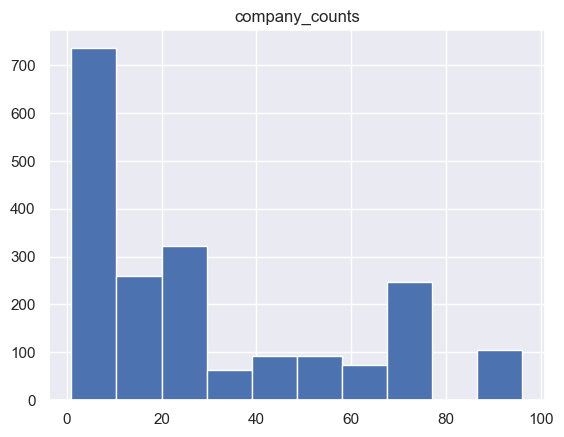

In [267]:
merged.hist(column='company_counts')

In [293]:
# Drop rows with fewer than 20 results for a given company 
test = merged[~(merged['company_counts'] <= 20)]  
test2 = test[~(test['company_counts'] > 95)]  
test2= test2.drop_duplicates()

In [298]:
#Results in Table 
test2.sort_values(by=['topsim'], ascending=False).tail(60)

,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,...,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim,company_counts
1411,1411,Q6002082,Q95,Q4182287,2007-07-01T00:00:00Z,Q191839,en,Google,en,ImageAmerica,...,Q191839,0.524881,web search engine,aerial photography,0.3816,0.498591,0.05087,0.099986,0.354332,72
75,75,Q13974,Q54173,Q192899,1986-01-01T00:00:00Z,Q11024,en,General Electric,en,NBC,...,Q11024,0.428214,finance lease,communication,0.367839,0.511624,0.006505,0.039903,0.345916,72
74,74,Q13974,Q54173,Q192899,1986-01-01T00:00:00Z,Q11024,en,General Electric,en,NBC,...,Q11024,0.428214,finance lease,communication,0.367839,0.511624,0.006505,0.039903,0.345916,72
2160,2160,Q64326907,Q61930516,Q2140665,2019-05-01T00:00:00Z,Q126793,en,Bell Resources,en,Bell Hub,...,Q126793,0.471336,electric vehicle charging station,retail,0.247404,0.496051,0.115077,0.137605,0.345007,48
2159,2159,Q64326907,Q61930516,Q2140665,2019-05-01T00:00:00Z,Q126793,en,Bell Resources,en,Bell Hub,...,Q126793,0.471336,electric vehicle charging station,retail,0.247404,0.496051,0.115077,0.137605,0.345007,48
2960,2960,Q125972007,Q125962737,Q998426,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q23582374,0.441617,bookselling,peer-to-peer ridesharing,0.252602,0.315538,0.166187,0.088768,0.343815,28
848,848,Q1924132,Q542511,Q507443,1965-01-01T00:00:00Z,Q4456821,en,Hoechst,en,Messer Group,...,Q4456821,0.495858,pharmaceutical industry,industrial gas,0.225005,0.528844,0.004944,0.027141,0.343139,70
989,989,Q2298325,Q95,Q4182287,2013-12-13T00:00:00Z,Q170978,en,Google,en,Boston Dynamics,...,Q170978,0.479663,web search engine,robotics,0.473961,0.548091,0.016376,0.085349,0.340727,72
1024,1024,Q3072675,Q1674879,Q936518,1994-01-01T00:00:00Z,Q14864997,en,Istituto per la Ricostruzione Industriale,en,Fintecna,...,Q14864997,0.502159,aerospace manufacturer,investment management,0.354251,0.520667,0.009459,0.038017,0.340397,24
2011,2011,Q58035402,Q54173,Q778575,1919-01-01T00:00:00Z,Q29584599,en,General Electric,en,Radio Corporation of America,...,Q29584599,0.422025,conglomerate,Manufacture of consumer electronics,0.178403,0.479332,0.027542,0.033313,0.339651,72


In [299]:
test2.sort_values(by=['topsim'], ascending=False).head(60)

,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,...,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim,company_counts
1391,1391,Q5999344,Q35476,Q418,1899-01-01T00:00:00Z,Q418,en,AT&T,en,Illinois Bell,...,Q418,1.0,telecommunication,telecommunication,1.0,1.0,1.0,1.0,1.0,24
877,877,Q1961036,Q312,Q581105,2014-08-01T00:00:00Z,Q581105,en,Apple,en,Beats Electronics,...,Q581105,1.0,consumer electronics,consumer electronics,1.0,1.0,1.0,1.0,1.0,56
911,911,Q2214105,Q201653,Q25245117,2018-11-01T00:00:00Z,Q25245117,en,SoftBank Group,en,SoftBank Mobile,...,Q25245117,1.0,telecommunications industry,telecommunications industry,1.0,1.0,1.0,1.0,1.0,56
117,117,Q246125,Q2283,Q880371,2011-10-13T00:00:00Z,Q880371,en,Microsoft,en,Skype Technologies,...,Q880371,1.0,software industry,software industry,1.0,1.0,1.0,1.0,1.0,28
969,969,Q3031783,Q3295867,Q4899370,2001-11-06T00:00:00Z,Q4899370,en,The Coca-Cola Company,en,Odwalla,...,Q4899370,1.0,beverage industry,beverage industry,1.0,1.0,1.0,1.0,1.0,21
1001,1001,Q3052066,Q3295867,Q4899370,1996-09-05T00:00:00Z,Q4899370,en,The Coca-Cola Company,en,Coca-Cola Andina,...,Q4899370,1.0,beverage industry,beverage industry,1.0,1.0,1.0,1.0,1.0,21
1098,1098,Q3995933,Q154037,Q862571,2010-01-01T00:00:00Z,Q862571,en,TotalEnergies,en,TotalErg,...,Q862571,1.0,petroleum industry,petroleum industry,1.0,1.0,1.0,1.0,1.0,64
1099,1099,Q3995933,Q154037,Q862571,2010-01-01T00:00:00Z,Q862571,en,TotalEnergies,en,TotalErg,...,Q862571,1.0,petroleum industry,petroleum industry,1.0,1.0,1.0,1.0,1.0,64
1232,1232,Q5322556,Q201653,Q25245117,2013-01-01T00:00:00Z,Q25245117,en,SoftBank Group,en,Ymobile Corporation,...,Q25245117,1.0,telecommunications industry,telecommunications industry,1.0,1.0,1.0,1.0,1.0,56
1327,1327,Q6354493,Q95,Q75,2003-09-01T00:00:00Z,Q75,en,Google,en,Kaltix Corp.,...,Q75,1.0,Internet,Internet,1.0,1.0,1.0,1.0,1.0,72


In [105]:
measy = merged.rename(columns={"company.value":"companyId",
                               "subsidiaryId.value":"subsidiaryId",
                               "companyLabel.value":"companyLabel",
                              "subsidiaryIdLabel.value":"subsidiaryLabel"})
measy

,Unnamed: 0,subsidiaryId,companyId,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel,subsidiaryIdLabel.xml:lang,subsidiaryLabel,...,q1,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim
0,0,http://www.wikidata.org/entity/Q23317,http://www.wikidata.org/entity/Q156578,Q190117,1966-01-01T00:00:00Z,Q190117,en,Volkswagen Group,en,Audi AG,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
1,1,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
2,2,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0
3,3,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q17018236,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286
4,4,http://www.wikidata.org/entity/Q27110,http://www.wikidata.org/entity/Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q17018236,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2958,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q27973,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q27973,Q23582374,0.786172,real-time ridesharing,peer-to-peer ridesharing,0.935825,0.969082,0.839539,0.959402,0.977826
2959,2959,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q638608,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q638608,Q23582374,0.593553,software development,peer-to-peer ridesharing,0.516606,0.299864,0.182079,0.095753,0.437221
2960,2960,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q998426,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q998426,Q23582374,0.441617,bookselling,peer-to-peer ridesharing,0.252602,0.315538,0.166187,0.088768,0.343815
2961,2961,http://www.wikidata.org/entity/Q125972007,http://www.wikidata.org/entity/Q125962737,Q56560668,2024-01-01T00:00:00Z,Q23582374,en,Book Technologies Inc.,en,Schedule Ltd,...,Q56560668,Q23582374,0.679147,book industry,peer-to-peer ridesharing,0.536848,0.278541,0.0,0.0,0.486868


In [102]:
import duckdb

In [170]:
duckdb.sql("""
select companyLabel, subsidiaryLabel, min(TRY_CAST(topsim AS DECIMAL)) as topsim,  ANY_VALUE(q2_label), ANY_VALUE(q1_label) from measy 
    where companyLabel='Google'
group by companyLabel, subsidiaryLabel
ORDER BY topsim DESC
""")

┌──────────────┬─────────────────┬───────────────┬──────────────────────┬─────────────────────┐
│ companyLabel │ subsidiaryLabel │    topsim     │ any_value(q2_label)  │ any_value(q1_label) │
│   varchar    │     varchar     │ decimal(18,3) │       varchar        │       varchar       │
├──────────────┼─────────────────┼───────────────┼──────────────────────┼─────────────────────┤
│ Google       │ Kaltix Corp.    │         0.461 │ Internet             │ Internet            │
│ Google       │ DoubleClick     │         0.437 │ Internet marketing   │ Internet            │
│ Google       │ Fitbit          │         0.429 │ consumer electronics │ Internet            │
│ Google       │ Google Nest     │         0.405 │ home automation      │ Internet            │
│ Google       │ Niantic         │         0.374 │ video game industry  │ Internet            │
│ Google       │ ImageAmerica    │         0.354 │ aerial photography   │ Internet            │
│ Google       │ Boston Dynamics │      

In [167]:
duckdb.sql("""
select companyLabel, subsidiaryLabel, topsim, q1_label, q2_label from measy 
    where companyLabel='Google' and subsidiaryLabel = 'ImageAmerica'
""")

┌──────────────┬─────────────────┬──────────────┬────────────────────────┬────────────────────┐
│ companyLabel │ subsidiaryLabel │    topsim    │        q1_label        │      q2_label      │
│   varchar    │     varchar     │   varchar    │        varchar         │      varchar       │
├──────────────┼─────────────────┼──────────────┼────────────────────────┼────────────────────┤
│ Google       │ ImageAmerica    │ 0.3656557673 │ Internet               │ aerial photography │
│ Google       │ ImageAmerica    │ 0.4849296804 │ information technology │ aerial photography │
│ Google       │ ImageAmerica    │ 0.3897698753 │ Internet marketing     │ aerial photography │
│ Google       │ ImageAmerica    │ 0.450632274  │ software industry      │ aerial photography │
│ Google       │ ImageAmerica    │ 0.354332205  │ web search engine      │ aerial photography │
│ Google       │ ImageAmerica    │ 0.3956282417 │ internet industry      │ aerial photography │
└──────────────┴─────────────────┴──────

In [181]:
duckdb.sql("""

select companyLabel, subsidiaryLabel, min(TRY_CAST(topsim AS DECIMAL)) as topsim,  ANY_VALUE(q2_label), ANY_VALUE(q1_label) from measy 

    where companyLabel='Van der Valk'

group by companyLabel, subsidiaryLabel

ORDER BY topsim DESC

""")

┌──────────────┬─────────────────────────────────────────┬───────────────┬─────────────────────┬─────────────────────┐
│ companyLabel │             subsidiaryLabel             │    topsim     │ any_value(q2_label) │ any_value(q1_label) │
│   varchar    │                 varchar                 │ decimal(18,3) │       varchar       │       varchar       │
├──────────────┼─────────────────────────────────────────┼───────────────┼─────────────────────┼─────────────────────┤
│ Van der Valk │ Van der Valk Hotel Gladbeck             │         0.551 │ hotel               │ horeca              │
│ Van der Valk │ Van der Valk Golfhotel Serrahn          │         0.551 │ hotel               │ horeca              │
│ Van der Valk │ Van der Valk Hotel Hamburg-Wittenburg   │         0.551 │ hotel               │ horeca              │
│ Van der Valk │ Van der Valk Resort Linstow             │         0.551 │ hotel               │ horeca              │
│ Van der Valk │ Van der Valk Hotel Melle - Osna

In [188]:
merged['company.value'] = merged['company.value'].map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
merged['subsidiaryId.value'] = merged['subsidiaryId.value'].astype(str).map(lambda x: x.lstrip('http://www.wikidata.org/entity/'))
merged["company_pair"] = merged["company.value"] + "-" + merged["subsidiaryId.value"]
merged.head()

,Unnamed: 0,subsidiaryId.value,company.value,industry.value,starttime.value,industry2.value,companyLabel.xml:lang,companyLabel.value,subsidiaryIdLabel.xml:lang,subsidiaryIdLabel.value,...,q2,complex,q1_label,q2_label,transe,text,class,jc,topsim,company_pair
0,0,Q23317,Q156578,Q190117,1966-01-01T00:00:00Z,Q190117,en,Volkswagen Group,en,Audi AG,...,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0,Q156578-Q23317
1,1,Q27110,Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0,Q855432-Q27110
2,2,Q27110,Q855432,Q190117,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,1.0,automotive industry,automotive industry,1.0,1.0,1.0,1.0,1.0,Q855432-Q27110
3,3,Q27110,Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286,Q855432-Q27110
4,4,Q27110,Q855432,Q17018236,1955-01-01T00:00:00Z,Q190117,en,Bianchi Bicycles,en,Autobianchi,...,Q190117,0.644906,bicycle industry,automotive industry,0.565315,0.63496,0.164951,0.284628,0.567286,Q855432-Q27110


In [198]:
sort_sim_values = merged[["company_pair", "companyLabel.value", "subsidiaryIdLabel.value", "q1_label", "q2_label", "topsim"]]
sort_sim_values["topsim"] = pd.to_numeric(sort_sim_values["topsim"])
sort_sim_values

/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/1622774516.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,company_pair,companyLabel.value,subsidiaryIdLabel.value,q1_label,q2_label,topsim
0,Q156578-Q23317,Volkswagen Group,Audi AG,automotive industry,automotive industry,1.000000
1,Q855432-Q27110,Bianchi Bicycles,Autobianchi,automotive industry,automotive industry,1.000000
2,Q855432-Q27110,Bianchi Bicycles,Autobianchi,automotive industry,automotive industry,1.000000
3,Q855432-Q27110,Bianchi Bicycles,Autobianchi,bicycle industry,automotive industry,0.567286
4,Q855432-Q27110,Bianchi Bicycles,Autobianchi,bicycle industry,automotive industry,0.567286
...,...,...,...,...,...,...
2958,Q125962737-Q125972007,Book Technologies Inc.,Schedule Ltd,real-time ridesharing,peer-to-peer ridesharing,0.977826
2959,Q125962737-Q125972007,Book Technologies Inc.,Schedule Ltd,software development,peer-to-peer ridesharing,0.437221
2960,Q125962737-Q125972007,Book Technologies Inc.,Schedule Ltd,bookselling,peer-to-peer ridesharing,0.343815
2961,Q125962737-Q125972007,Book Technologies Inc.,Schedule Ltd,book industry,peer-to-peer ridesharing,0.486868


In [200]:
min_values = sort_sim_values.groupby('company_pair')['topsim'].min()


company_pair
Q1017682-Q22075706            NaN
Q102280007-Q102280324    1.000000
Q1023765-Q153669         0.907818
Q1024869-Q5895075        1.000000
Q102673-Q16635462        0.385885
Name: topsim, dtype: float64

In [225]:
#merged["topsim"] = pd.to_numeric(merged["topsim"])
#merged = merged.groupby(['companyLabel.value', 'subsidiaryIdLabel.value']).topsim.agg(['min', 'max', 'mean']).dropna().reset_index()
merged.sort_values(by=['mean','companyLabel.value'], ascending=False).head(100)

,companyLabel.value,subsidiaryIdLabel.value,min,max,mean
526,Wind Tre,3 Italy,1.0,1.0,1.0
527,Wind Tre,Wind Telecomunicazioni,1.0,1.0,1.0
524,Wind Telecomunicazioni,Infostrada,1.0,1.0,1.0
521,Wind Telecom,Global Telecom Holding,1.0,1.0,1.0
522,Wind Telecom,WIND Hellas,1.0,1.0,1.0
...,...,...,...,...,...
167,Finlayson,Vaasan puuvilla Osakeyhtiö,1.0,1.0,1.0
166,Fiat S.p.A.,Fiat Concord,1.0,1.0,1.0
163,Federated Department Stores,Bloomingdale's,1.0,1.0,1.0
164,Federated Department Stores,I. Magnin,1.0,1.0,1.0


In [243]:
gcc = merged.groupby(by=["companyLabel.value"]).mean()
gcc.sort_values(by=['mean','companyLabel.value'], ascending=False).tail(10)

/var/folders/db/zljc_tr15nbcxyj7j4frgzlr0000gn/T/ipykernel_83630/1976226509.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,min,max,mean
companyLabel.value,,,
Panda Energy International,0.284976,0.392867,0.338922
Porsche Automobil Holding SE,0.326190,0.326190,0.326190
Bushiroad,0.316780,0.316780,0.316780
Stanley Black & Decker,0.301052,0.323120,0.312086
"American Broadcasting-Paramount Theatres, Inc.",0.308247,0.308247,0.308247
Talgo,0.293636,0.296126,0.294881
SGM Distribuzione,0.272918,0.272918,0.272918
Smartwings,0.132670,0.399144,0.265907
Letiště Praha,0.262330,0.262330,0.262330


In [239]:
merged

,companyLabel.value,subsidiaryIdLabel.value,min,max,mean
0,ABB Group,Cylon Controls Ltd.,0.407210,0.431400,0.419305
1,ABB Group,Niessen,0.694207,1.000000,0.847103
2,AEG,Küppersbusch,0.382622,1.000000,0.616316
3,AG für Verkehrswesen,Allgemeine Baugesellschaft Lenz & Co.,0.363860,0.933615,0.581937
4,AIA Group,AIA Philippines,1.000000,1.000000,1.000000
...,...,...,...,...,...
536,eBay,PayPal,0.493425,0.526209,0.509817
537,eBay,Skype Technologies,0.512797,0.516683,0.514740
538,České dráhy,Dopravní vzdělávací institut,0.404803,0.404803,0.404803
539,České dráhy,ČD - Telematika,0.503801,0.523705,0.513753
